In [57]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [58]:
# Load daily data from Yahoo finance:
tickers= ['AAL', 'ALK','BA','GD','JNJ', 'MSFT', 'BRK-B', 'META', 'TSLA','BSX']
start_date = '2022-01-01'
df = yf.download(tickers, start_date)['Adj Close']

[*********************100%***********************]  10 of 10 completed


In [59]:
df=df.dropna() # Drop missing values.
returns = df.pct_change()
# Calculate correlations
correlation=returns.corr()
correlation

,AAL,ALK,BA,BRK-B,BSX,GD,JNJ,META,MSFT,TSLA
AAL,1.000000,0.873586,0.727975,0.481867,0.479907,0.187968,0.122976,0.490201,0.503248,0.548956
ALK,0.873586,1.000000,0.725157,0.529520,0.515128,0.194820,0.103212,0.480414,0.513946,0.492299
BA,0.727975,0.725157,1.000000,0.474185,0.453231,0.266082,0.066808,0.445775,0.433076,0.573616
BRK-B,0.481867,0.529520,0.474185,1.000000,0.552035,0.658867,0.500127,0.422755,0.525647,0.397495
BSX,0.479907,0.515128,0.453231,0.552035,1.000000,0.450917,0.381870,0.242621,0.567502,0.416602
GD,0.187968,0.194820,0.266082,0.658867,0.450917,1.000000,0.451074,0.206553,0.415991,0.234992
JNJ,0.122976,0.103212,0.066808,0.500127,0.381870,0.451074,1.000000,0.102367,0.237767,0.063834
META,0.490201,0.480414,0.445775,0.422755,0.242621,0.206553,0.102367,1.000000,0.624756,0.462994
MSFT,0.503248,0.513946,0.433076,0.525647,0.567502,0.415991,0.237767,0.624756,1.000000,0.647891
TSLA,0.548956,0.492299,0.573616,0.397495,0.416602,0.234992,0.063834,0.462994,0.647891,1.000000


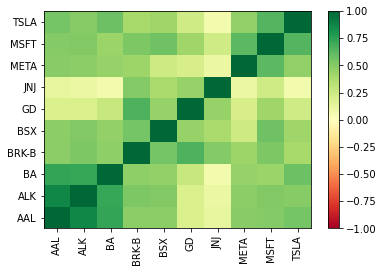

In [60]:
#visualizing the correlations by using heatmaps:
fig= plt.figure()
ax= fig.add_subplot(1,1,1)

ax.set_xticks(np.arange(correlation.shape[0])+0.5, minor= False)
ax.set_yticks(np.arange(correlation.shape[1])+0.5, minor= False)

heatmap= ax.pcolor(correlation, cmap= plt.cm.RdYlGn) # Negative: Red, Positive: Green, No correlation: Yellow
fig.colorbar(heatmap)

# company names on the axes instead of numbers:
ax.set_xticklabels(correlation.index)
ax.set_yticklabels(correlation.columns)

plt.xticks(rotation=90)
heatmap.set_clim(-1,1) #Color limit between -1 and 1
plt.show()

In [61]:
# Correlation matrix with both colors and correlation coefficients:
mask = np.zeros_like(correlation, dtype=bool)
mask[np.triu_indices_from(mask)] = True
correlation[mask] = np.nan
(correlation
 .style
 .background_gradient(cmap= plt.cm.RdYlGn, axis=None, vmin=-1, vmax=1)
 .highlight_null(null_color='#f1f1f1')  # Color NaNs grey
 .set_precision(2))


C:\Users\ams40\AppData\Local\Temp\ipykernel_14176\2497054612.py:6: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  (correlation


,AAL,ALK,BA,BRK-B,BSX,GD,JNJ,META,MSFT,TSLA
AAL,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
ALK,0.87,nan,nan,nan,nan,nan,nan,nan,nan,nan
BA,0.73,0.73,nan,nan,nan,nan,nan,nan,nan,nan
BRK-B,0.48,0.53,0.47,nan,nan,nan,nan,nan,nan,nan
BSX,0.48,0.52,0.45,0.55,nan,nan,nan,nan,nan,nan
GD,0.19,0.19,0.27,0.66,0.45,nan,nan,nan,nan,nan
JNJ,0.12,0.10,0.07,0.50,0.38,0.45,nan,nan,nan,nan
META,0.49,0.48,0.45,0.42,0.24,0.21,0.10,nan,nan,nan
MSFT,0.50,0.51,0.43,0.53,0.57,0.42,0.24,0.62,nan,nan
TSLA,0.55,0.49,0.57,0.40,0.42,0.23,0.06,0.46,0.65,nan
